In [152]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [153]:
class Call_back(tf.keras.callbacks.Callback):

    def __init__(self, acc_threshold=0.98, print_msg=True):
        super(Call_back, self).__init__()
        self.acc_threshold = acc_threshold
        self.print_msg = print_msg

    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > self.acc_threshold):
            if self.print_msg:
                print("\n-->Reached 96% accuracy so cancelling the training")
            self.model.stop_training = True
        else:
            if self.print_msg:
                print("\nAccuracy not high enough. Starting another epoch...\n")

In [154]:
callbacks = Call_back()

# Test without Convolution layers

In [155]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [156]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [157]:
def build_model(num_layers=1, architecture=[32],act_func='swish', input_shape=(28,28), output_class=10):
    """
    Builds a densely connected neural network model from user input
    num_layers: Number of hidden layers
    architecture: Architecture of the hidden layers (densely connected)
    act_func: Activation function. Could be 'relu', 'sigmoid', or 'tanh'.
    input_shape: Dimension of the input vector
    output_class: Number of classes in the output vector
    """
    layers=[tf.keras.layers.Flatten(input_shape=input_shape)]
#     if act_func=='relu':
#         activation=tf.nn.relu
#     elif act_func=='sigmoid':
#         activation=tf.nn.sigmoid
#     elif act_func=='tanh':
#         activation=tf.nn.tanh

    for i in range(num_layers):
        layers.append(tf.keras.layers.Dense(architecture[i], activation=tf.nn.swish))
    layers.append(tf.keras.layers.Dense(output_class, activation=tf.nn.softmax))

    model = tf.keras.models.Sequential(layers)
    return model

In [158]:
model = build_model(num_layers=1,architecture=[128])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_41 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_77 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [159]:
model.fit(x_train, y_train, epochs=20, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/20
59744/60000 [============================>.] - ETA: 0s - loss: 0.4879 - accuracy: 0.8275
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 3s 46us/sample - loss: 0.4876 - accuracy: 0.8277
Epoch 2/20
58880/60000 [============================>.] - ETA: 0s - loss: 0.3630 - accuracy: 0.8670
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 2s 40us/sample - loss: 0.3624 - accuracy: 0.8673
Epoch 3/20
59744/60000 [============================>.] - ETA: 0s - loss: 0.3244 - accuracy: 0.8821
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 3s 45us/sample - loss: 0.3242 - accuracy: 0.8824
Epoch 4/20
59488/60000 [============================>.] - ETA: 0s - loss: 0.3000 - accuracy: 0.8894
Accuracy not high enough. Starting another epoch...

60000/60000 [==============================] - 3s 44us/sample - loss: 0.3002 

In [149]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3301 - accuracy: 0.8837


[0.3301166266977787, 0.8837]

In [111]:
def compile_train_model(model,x_train, y_train, callbacks=None, learning_rate=0.001,batch_size=1,epochs=10,verbose=0):
    """
    Compiles and trains a given Keras model with the given data. 
    Assumes Adam optimizer for this implementation.

    learning_rate: Learning rate for the optimizer Adam
    batch_size: Batch size for the mini-batch optimization
    epochs: Number of epochs to train
    verbose: Verbosity of the training process
    """

    model_copy = model
    model_copy.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    model_copy.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                 callbacks=[callbacks],verbose=verbose)
    return model_copy

In [114]:
def plot_loss_acc(model,target_acc=0.9, title=None):
    """
    Takes a deep learning model and plots the loss ans accuracy over epochs
    Users can supply a title if needed
    target_acc: The desired/ target acc. This parameter is needed for this function to show a horizontal bar.
    """
    e=np.array(model.history.epoch)+1 # Add one to the list of epochs which is zero-indexed
    l=np.array(model.history.history['loss'])
    a=np.array(model.history.history['accuracy'])

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Epochs',fontsize=15)
    ax1.set_ylabel('Loss', color=color,fontsize=15)
    ax1.plot(e, l, color=color,lw=2)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color,fontsize=15)  # we already handled the x-label with ax1
    ax2.plot(e, a, color=color,lw=2)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if title!=None:
        plt.title(title)
    plt.hlines(y=target_acc,xmin=1,xmax=e.max(),colors='k', linestyles='dashed',lw=3)
    plt.show()

In [115]:

from itertools import product

accuracy_desired = [0.95,0.96,0.97]
num_neurons = [32,64,128]

cases = list(product(accuracy_desired,num_neurons))

print("So, the cases we are considering are as follows...\n")
for i,c in enumerate(cases):
    print(f"Accuracy target {c[0]}, number of neurons: {c[1]}"
    if (i+1)%4==0 and (i+1)!=len(cases):
        print("-"*50)

So, the cases we are considering are as follows...

Accuracy target 0.95, number of neurons: 32
Accuracy target 0.95, number of neurons: 64
Accuracy target 0.95, number of neurons: 128
Accuracy target 0.96, number of neurons: 32
--------------------------------------------------
Accuracy target 0.96, number of neurons: 64
Accuracy target 0.96, number of neurons: 128
Accuracy target 0.97, number of neurons: 32
Accuracy target 0.97, number of neurons: 64
--------------------------------------------------
Accuracy target 0.97, number of neurons: 128


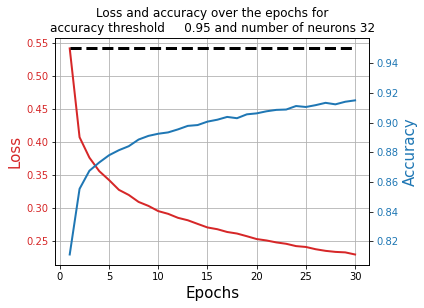

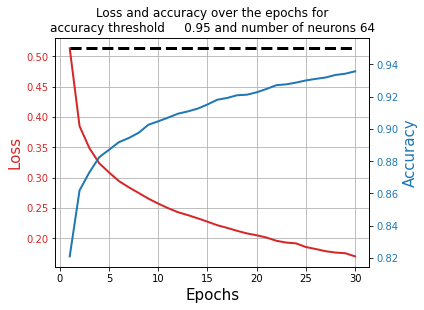

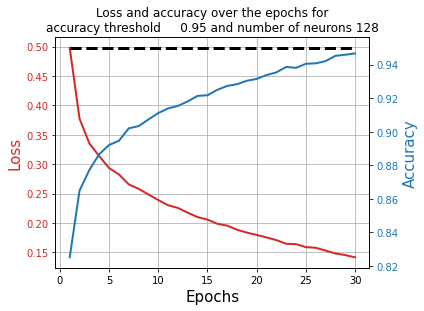

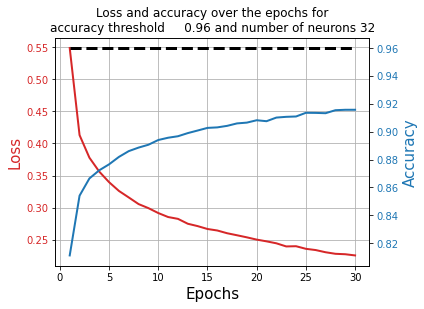

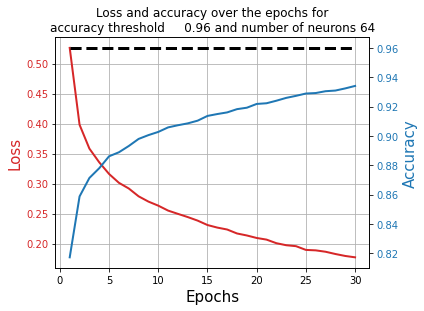

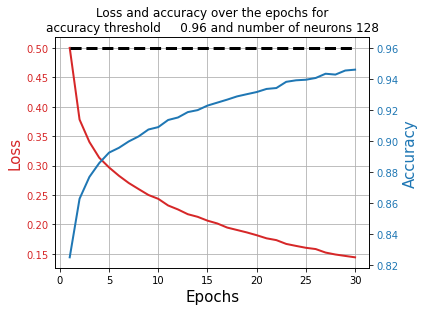

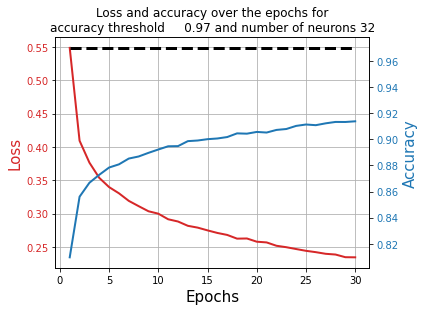

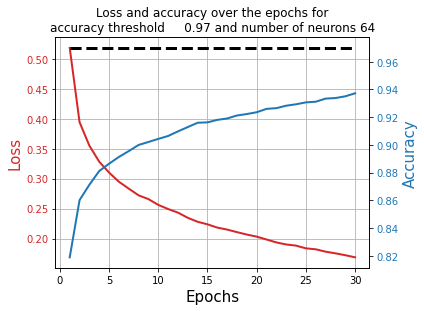

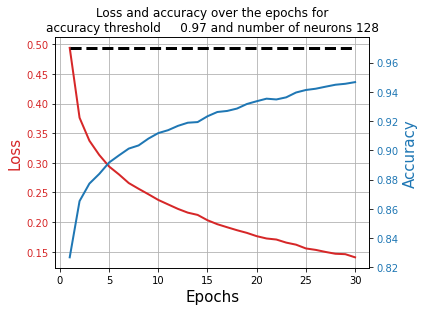

In [116]:
for c in cases:
    # Create a mycallback class with the specific accuracy target 
    callbacks = Call_back(c[0], print_msg=False)

    # Build a model with a specific number of neurons
    model = build_model(num_layers=1,architecture=[c[1]])

    # Compile and train the model passing on the callback class,choose suitable batch size and a max epoch limit
    model = compile_train_model(model, x_train,y_train,callbacks=callbacks,
                              batch_size=32,epochs=30)

    # Construct a suitable title string for displaying the results properly
    title = f"Loss and accuracy over the epochs for\naccuracy threshold {c[0]} and number of neurons {c[1]}".)

    # Use the plotting utility function, pass on the accuracy target, 
    # trained model, and the custom title string
    plot_loss_acc(model,target_acc=c[0],title=title)

In [117]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.4148 - accuracy: 0.8858


[0.4148418107330799, 0.8858]